# Preprocessing 

In [1]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [3]:
# Read database
df = pd.read_csv('cardio_train.csv', sep = ';')
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [5]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [7]:
list(df.columns)

['id',
 'age',
 'gender',
 'height',
 'weight',
 'ap_hi',
 'ap_lo',
 'cholesterol',
 'gluc',
 'smoke',
 'alco',
 'active',
 'cardio']

In [9]:
#no. of recodrds
df.shape[0]

70000

In [11]:
#no. of Coloums/Features
df.shape[1]

13

In [13]:
#inormation about database
df.info()
df['height'].describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


count    70000.000000
mean       164.359229
std          8.210126
min         55.000000
25%        159.000000
50%        165.000000
75%        170.000000
max        250.000000
Name: height, dtype: float64

In [15]:
#describe database
df.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
id,70000.0,49972.419900,28851.302323,0.0,25006.75,50001.5,74889.25,99999.0
age,70000.0,19468.865814,2467.251667,10798.0,17664.00,19703.0,21327.00,23713.0
gender,70000.0,1.349571,0.476838,1.0,1.00,1.0,2.00,2.0
height,70000.0,164.359229,8.210126,55.0,159.00,165.0,170.00,250.0
weight,70000.0,74.205690,14.395757,10.0,65.00,72.0,82.00,200.0
ap_hi,70000.0,128.817286,154.011419,-150.0,120.00,120.0,140.00,16020.0
ap_lo,70000.0,96.630414,188.472530,-70.0,80.00,80.0,90.00,11000.0
cholesterol,70000.0,1.366871,0.680250,1.0,1.00,1.0,2.00,3.0
gluc,70000.0,1.226457,0.572270,1.0,1.00,1.0,1.00,3.0
smoke,70000.0,0.088129,0.283484,0.0,0.00,0.0,0.00,1.0


### Data Preprocessing

In [18]:
#missing values
pd.DataFrame([df.isnull().sum()])

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [20]:
#dublicat row 
print(df.duplicated().sum())

0


In [22]:
#unique values
pd.DataFrame([ df.nunique(), df.dtypes ])

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,70000,8076,2,109,287,153,157,3,3,2,2,2,2
1,int64,int64,int64,int64,float64,int64,int64,int64,int64,int64,int64,int64,int64


In [24]:
df = df.drop(columns = 'id')

In [26]:
list(df.columns)

['age',
 'gender',
 'height',
 'weight',
 'ap_hi',
 'ap_lo',
 'cholesterol',
 'gluc',
 'smoke',
 'alco',
 'active',
 'cardio']

In [28]:

#dublicat row 
print(df.duplicated().sum())

24


In [30]:
df.drop_duplicates(inplace=True)

In [32]:
print(df.duplicated().sum())

0


In [34]:
print(df.isnull().sum())

age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64


### Feauter Engineering

In [37]:
list(df.columns)

['age',
 'gender',
 'height',
 'weight',
 'ap_hi',
 'ap_lo',
 'cholesterol',
 'gluc',
 'smoke',
 'alco',
 'active',
 'cardio']

In [39]:
df.head(5)

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [41]:
## days to age
df['age_years'] = (df['age'] / 365).astype(int)
df[['age', 'age_years']]

,age,age_years
0,18393,50
1,20228,55
2,18857,51
3,17623,48
4,17474,47
...,...,...
69995,19240,52
69996,22601,61
69997,19066,52
69998,22431,61


In [43]:
# Height
df['height'] = df['height']/100

In [45]:
# BMI
df['bmi'] = df['weight']/(df['height']**2)

In [47]:
# Pulse Pressure = Systolic - Diastoli
df['pulse_pressure'] = df['ap_hi'] - df['ap_lo']

In [49]:
# Health risk index 
df["health_index"] = (
    (df["cholesterol"] > 1).astype(int) +
    (df["gluc"] > 1).astype(int) +
    df["smoke"] +
    df["alco"] +
    (df["active"] == 0).astype(int)
)

In [51]:
df = df.drop(columns = 'age') 

In [53]:
df = df.drop(columns = 'height')

In [55]:
df.columns

Index(['gender', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc', 'smoke',
       'alco', 'active', 'cardio', 'age_years', 'bmi', 'pulse_pressure',
       'health_index'],
      dtype='object')

In [57]:
TARGET = 'cardio'

FEATURES = [
    'age_years',
    'gender',
    'weight',
    'ap_hi',
    'ap_lo',
    'cholesterol',
    'gluc',
    'smoke',
    'alco',
    'active',
    'bmi',
    'pulse_pressure',
    'health_index'
]


In [59]:
X = df[FEATURES]
y = df[TARGET]

In [61]:
print("Features used for training:", FEATURES)
print("Total features:", len(FEATURES))

Features used for training: ['age_years', 'gender', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'bmi', 'pulse_pressure', 'health_index']
Total features: 13


In [63]:
df

,gender,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,bmi,pulse_pressure,health_index
0,2,62.0,110,80,1,1,0,0,1,0,50,21.967120,30,0
1,1,85.0,140,90,3,1,0,0,1,1,55,34.927679,50,1
2,1,64.0,130,70,3,1,0,0,0,1,51,23.507805,60,2
3,2,82.0,150,100,1,1,0,0,1,1,48,28.710479,50,0
4,1,56.0,100,60,1,1,0,0,0,0,47,23.011177,40,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,2,76.0,120,80,1,1,1,0,1,0,52,26.927438,40,1
69996,1,126.0,140,90,2,2,0,0,1,1,61,50.472681,50,2
69997,2,105.0,180,90,3,1,0,1,0,1,52,31.353579,90,3
69998,1,72.0,135,80,1,2,0,0,0,1,61,27.099251,55,2


### EDA AND VISUALIZATION

In [66]:
#class Distribution
class_dist = df['cardio'].value_counts().reset_index()
class_dist.columns = ['Class', 'Count']
class_dist['Class'] = class_dist['Class'].map({0: 'No Disease', 1: 'Disease'})
class_dist['Percentage'] = (class_dist['Count'] / len(df) * 100)
class_dist

,Class,Count,Percentage
0,No Disease,35004,50.022865
1,Disease,34972,49.977135


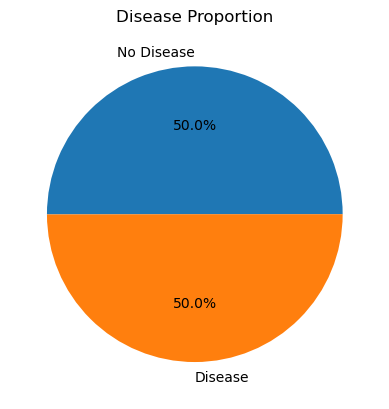

,gender,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,bmi,pulse_pressure,health_index
0,2,62.0,110,80,1,1,0,0,1,0,50,21.967120,30,0
1,1,85.0,140,90,3,1,0,0,1,1,55,34.927679,50,1
2,1,64.0,130,70,3,1,0,0,0,1,51,23.507805,60,2
3,2,82.0,150,100,1,1,0,0,1,1,48,28.710479,50,0
4,1,56.0,100,60,1,1,0,0,0,0,47,23.011177,40,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,2,76.0,120,80,1,1,1,0,1,0,52,26.927438,40,1
69996,1,126.0,140,90,2,2,0,0,1,1,61,50.472681,50,2
69997,2,105.0,180,90,3,1,0,1,0,1,52,31.353579,90,3
69998,1,72.0,135,80,1,2,0,0,0,1,61,27.099251,55,2


In [68]:
#target value Pie chart
cardio_counts = df['cardio'].value_counts()

labels = ['No Disease', 'Disease']

plt.pie(cardio_counts, labels=labels, autopct='%1.1f%%')
plt.title("Disease Proportion")
plt.show()
df

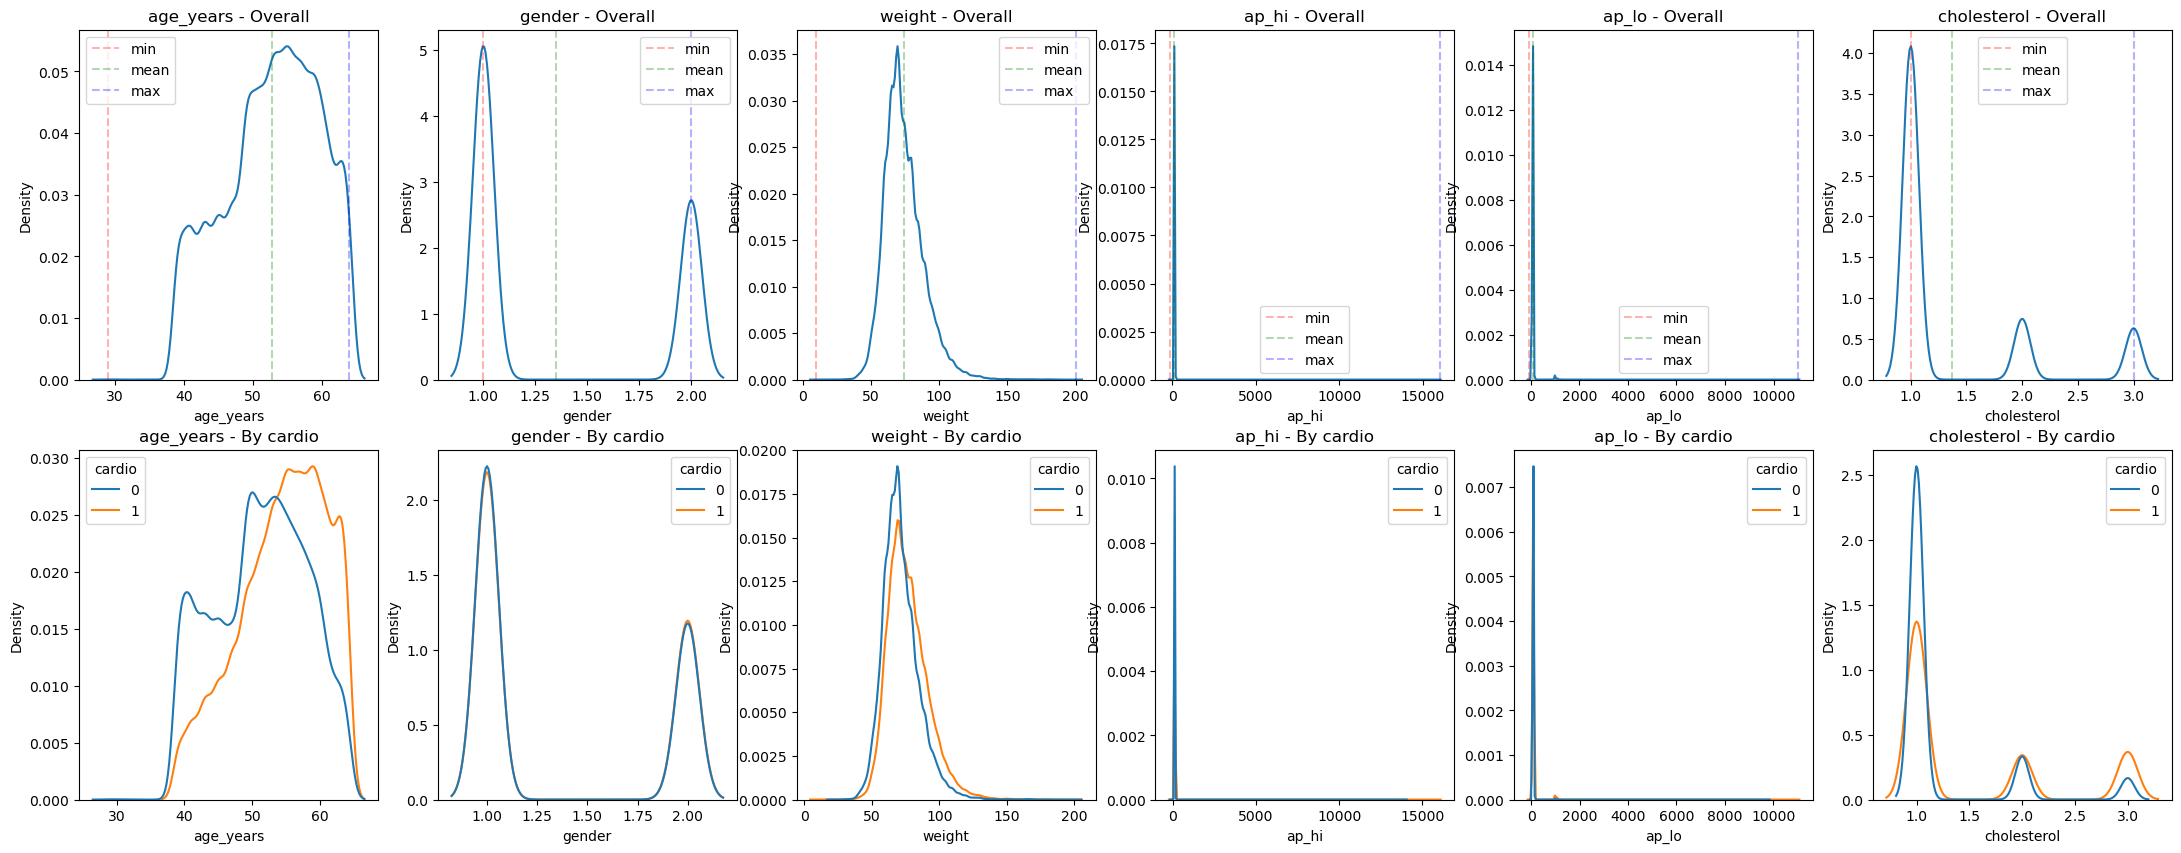

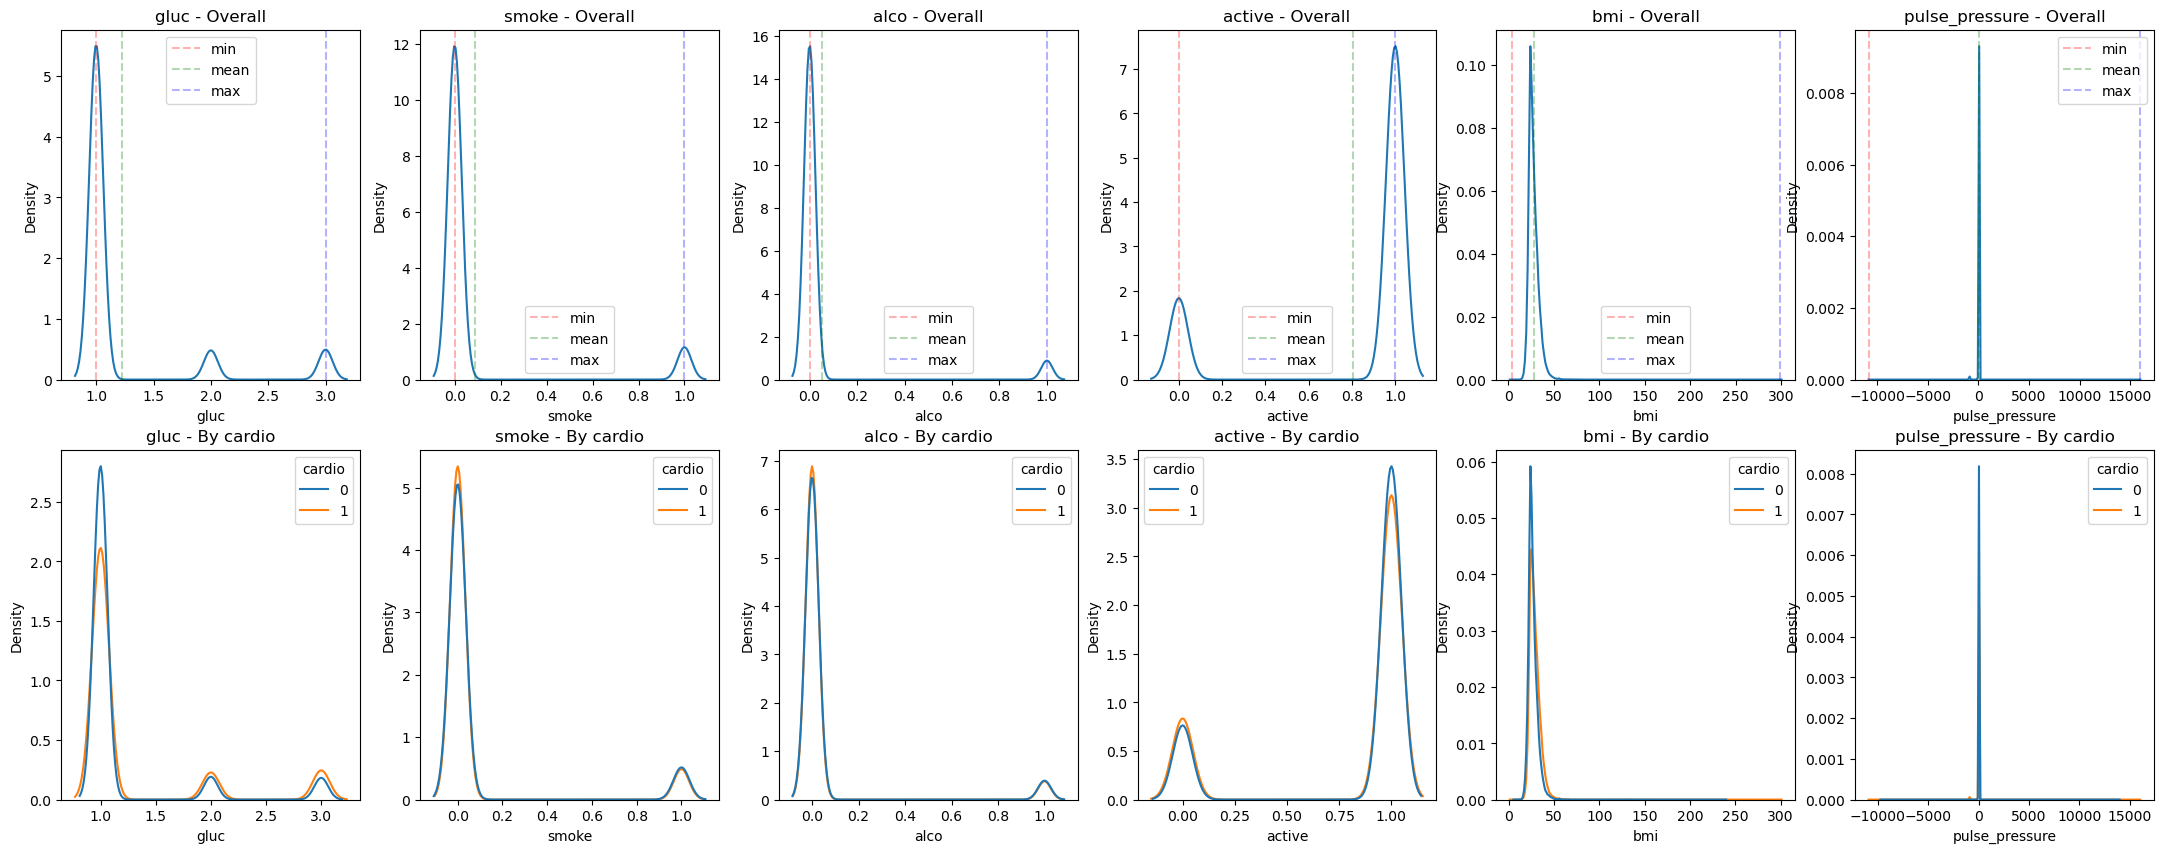

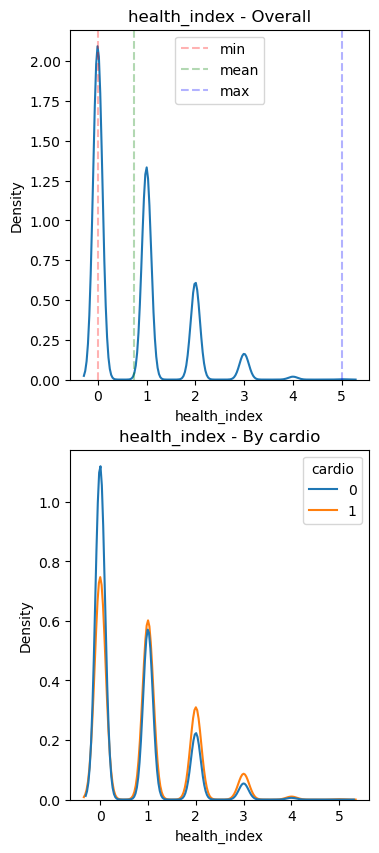

In [70]:
ROW_WIDTH = 6

for i, feature in enumerate(FEATURES):

    # Create a new figure every 6 features
    if i % ROW_WIDTH == 0:
        plt.figure(figsize=(27, 10))

    # -------- Plot 1: Overall distribution --------
    plt.subplot(2, ROW_WIDTH, (i % ROW_WIDTH) + 1)
    plt.title(f"{feature} - Overall")
    sns.kdeplot(data=df, x=feature)

    plt.axvline(df[feature].min(), color='r', linestyle='--', alpha=0.3, label='min')
    plt.axvline(df[feature].mean(), color='g', linestyle='--', alpha=0.3, label='mean')
    plt.axvline(df[feature].max(), color='b', linestyle='--', alpha=0.3, label='max')
    plt.legend()

    # -------- Plot 2: Distribution by target --------
    plt.subplot(2, ROW_WIDTH, (i % ROW_WIDTH) + 1 + ROW_WIDTH)
    plt.title(f"{feature} - By {TARGET}")
    sns.kdeplot(data=df, x=feature, hue=TARGET, palette='tab10')

    # Show plot after every 6 features
    if (i + 1) % ROW_WIDTH == 0:
        plt.show()

# Show remaining plots (if features < multiple of 6)
if len(FEATURES) % ROW_WIDTH != 0:
    plt.show()

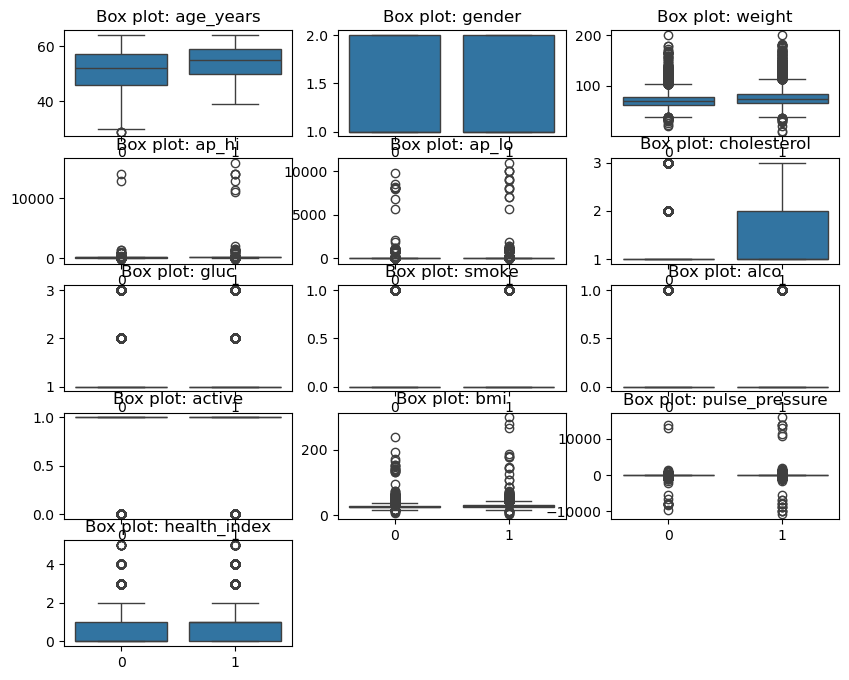

In [72]:
N_COLS = 3
N_ROWS = math.ceil(len(FEATURES) / N_COLS)

plt.figure(figsize=(10,8))

for i, feature in enumerate(FEATURES):
    plt.subplot(N_ROWS, N_COLS, i+1)
    plt.title(f"Box plot: {feature}")
    sns.boxplot(df, x=TARGET, y=feature)
    plt.ylabel("")
    plt.xlabel('')

plt.show()

### Outliers

In [75]:
def plot_box(features, hue):
    ROW_WIDTH = 6
    temp = 0

    for num_feature in features:
        if temp == 0:
            plt.figure(figsize=(25,5))

        plt.subplot(1,ROW_WIDTH, temp + 1)
        plt.title(f"Box plot: {num_feature}")
        sns.boxplot(df, x=num_feature, hue=hue, palette='rocket')

        if temp == ROW_WIDTH - 1:
            plt.show()

        temp = (temp + 1) % ROW_WIDTH

    if temp != ROW_WIDTH - 1:
        plt.show()

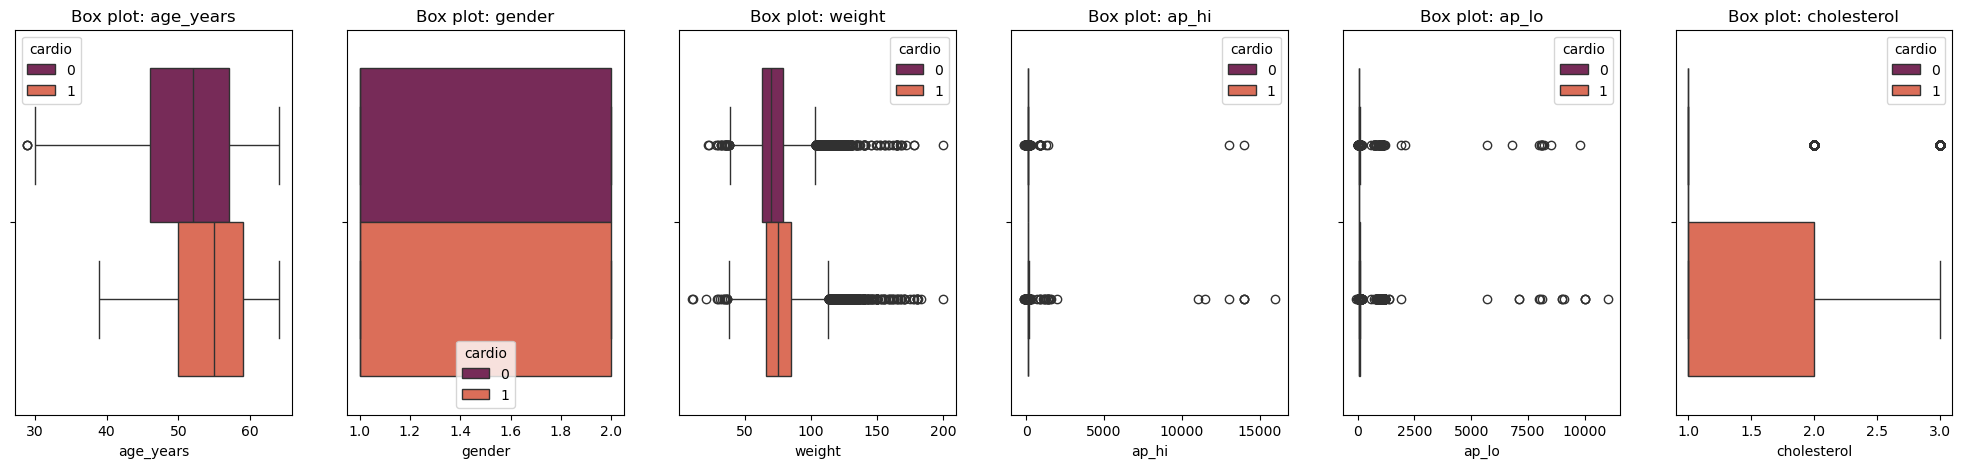

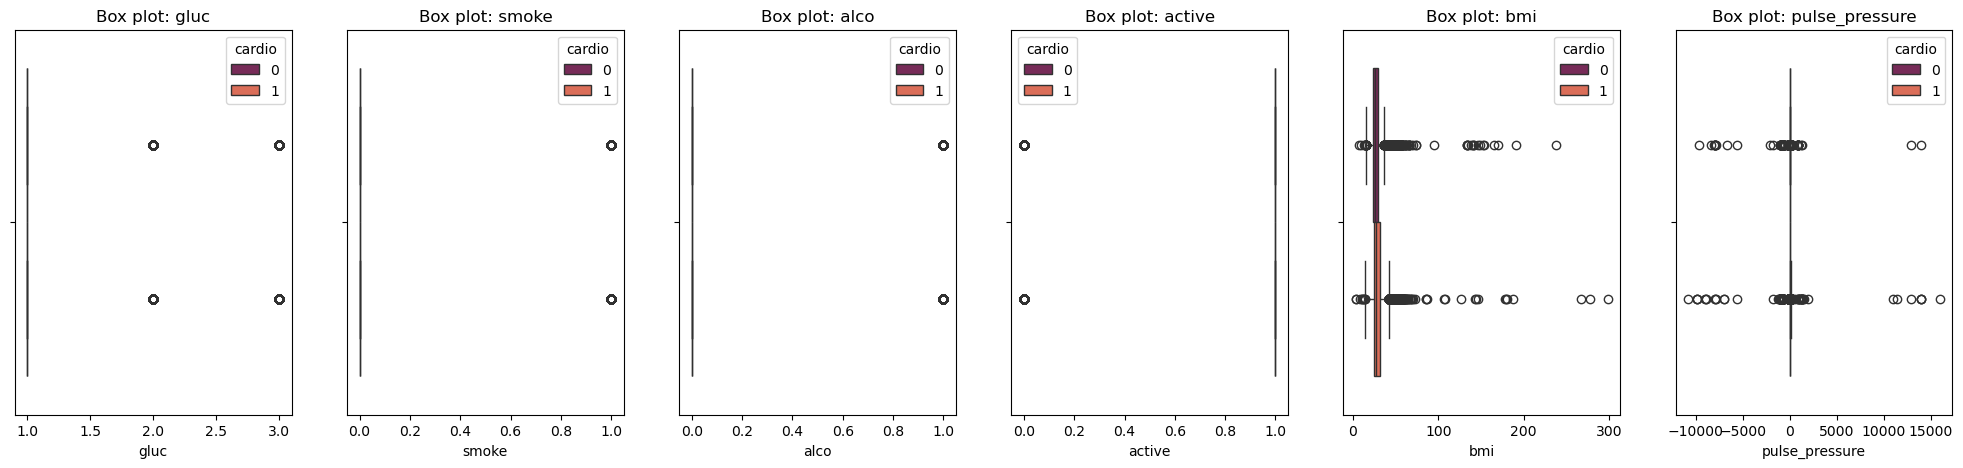

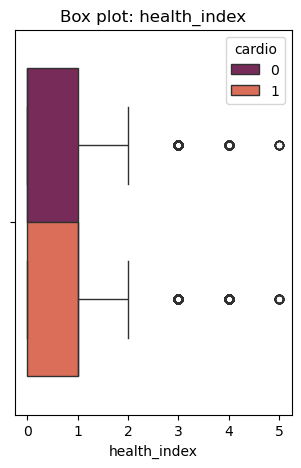

In [77]:
plot_box(FEATURES, TARGET)

In [79]:
def IQR(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)

    IQR = Q3 - Q1

    min_v = Q1 - 1.5 * IQR
    max_v = Q3 + 1.5 * IQR

    return series.clip(lower=min_v, upper=max_v)

In [81]:
def show_IQR_bounds(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR_val = Q3 - Q1
    return Q1 - 1.5*IQR_val, Q3 + 1.5*IQR_val


for col in FEATURES:
    if col not in ['gluc','alco','smoke','cholesterol','active']:
        low, high = show_IQR_bounds(df[col])
        print(f"{col}: [{low:.2f}, {high:.2f}]")

age_years: [33.00, 73.00]
gender: [-0.50, 3.50]
weight: [39.50, 107.50]
ap_hi: [90.00, 170.00]
ap_lo: [65.00, 105.00]
bmi: [14.35, 39.74]
pulse_pressure: [25.00, 65.00]
health_index: [-1.50, 2.50]


### Correlation Matrix 

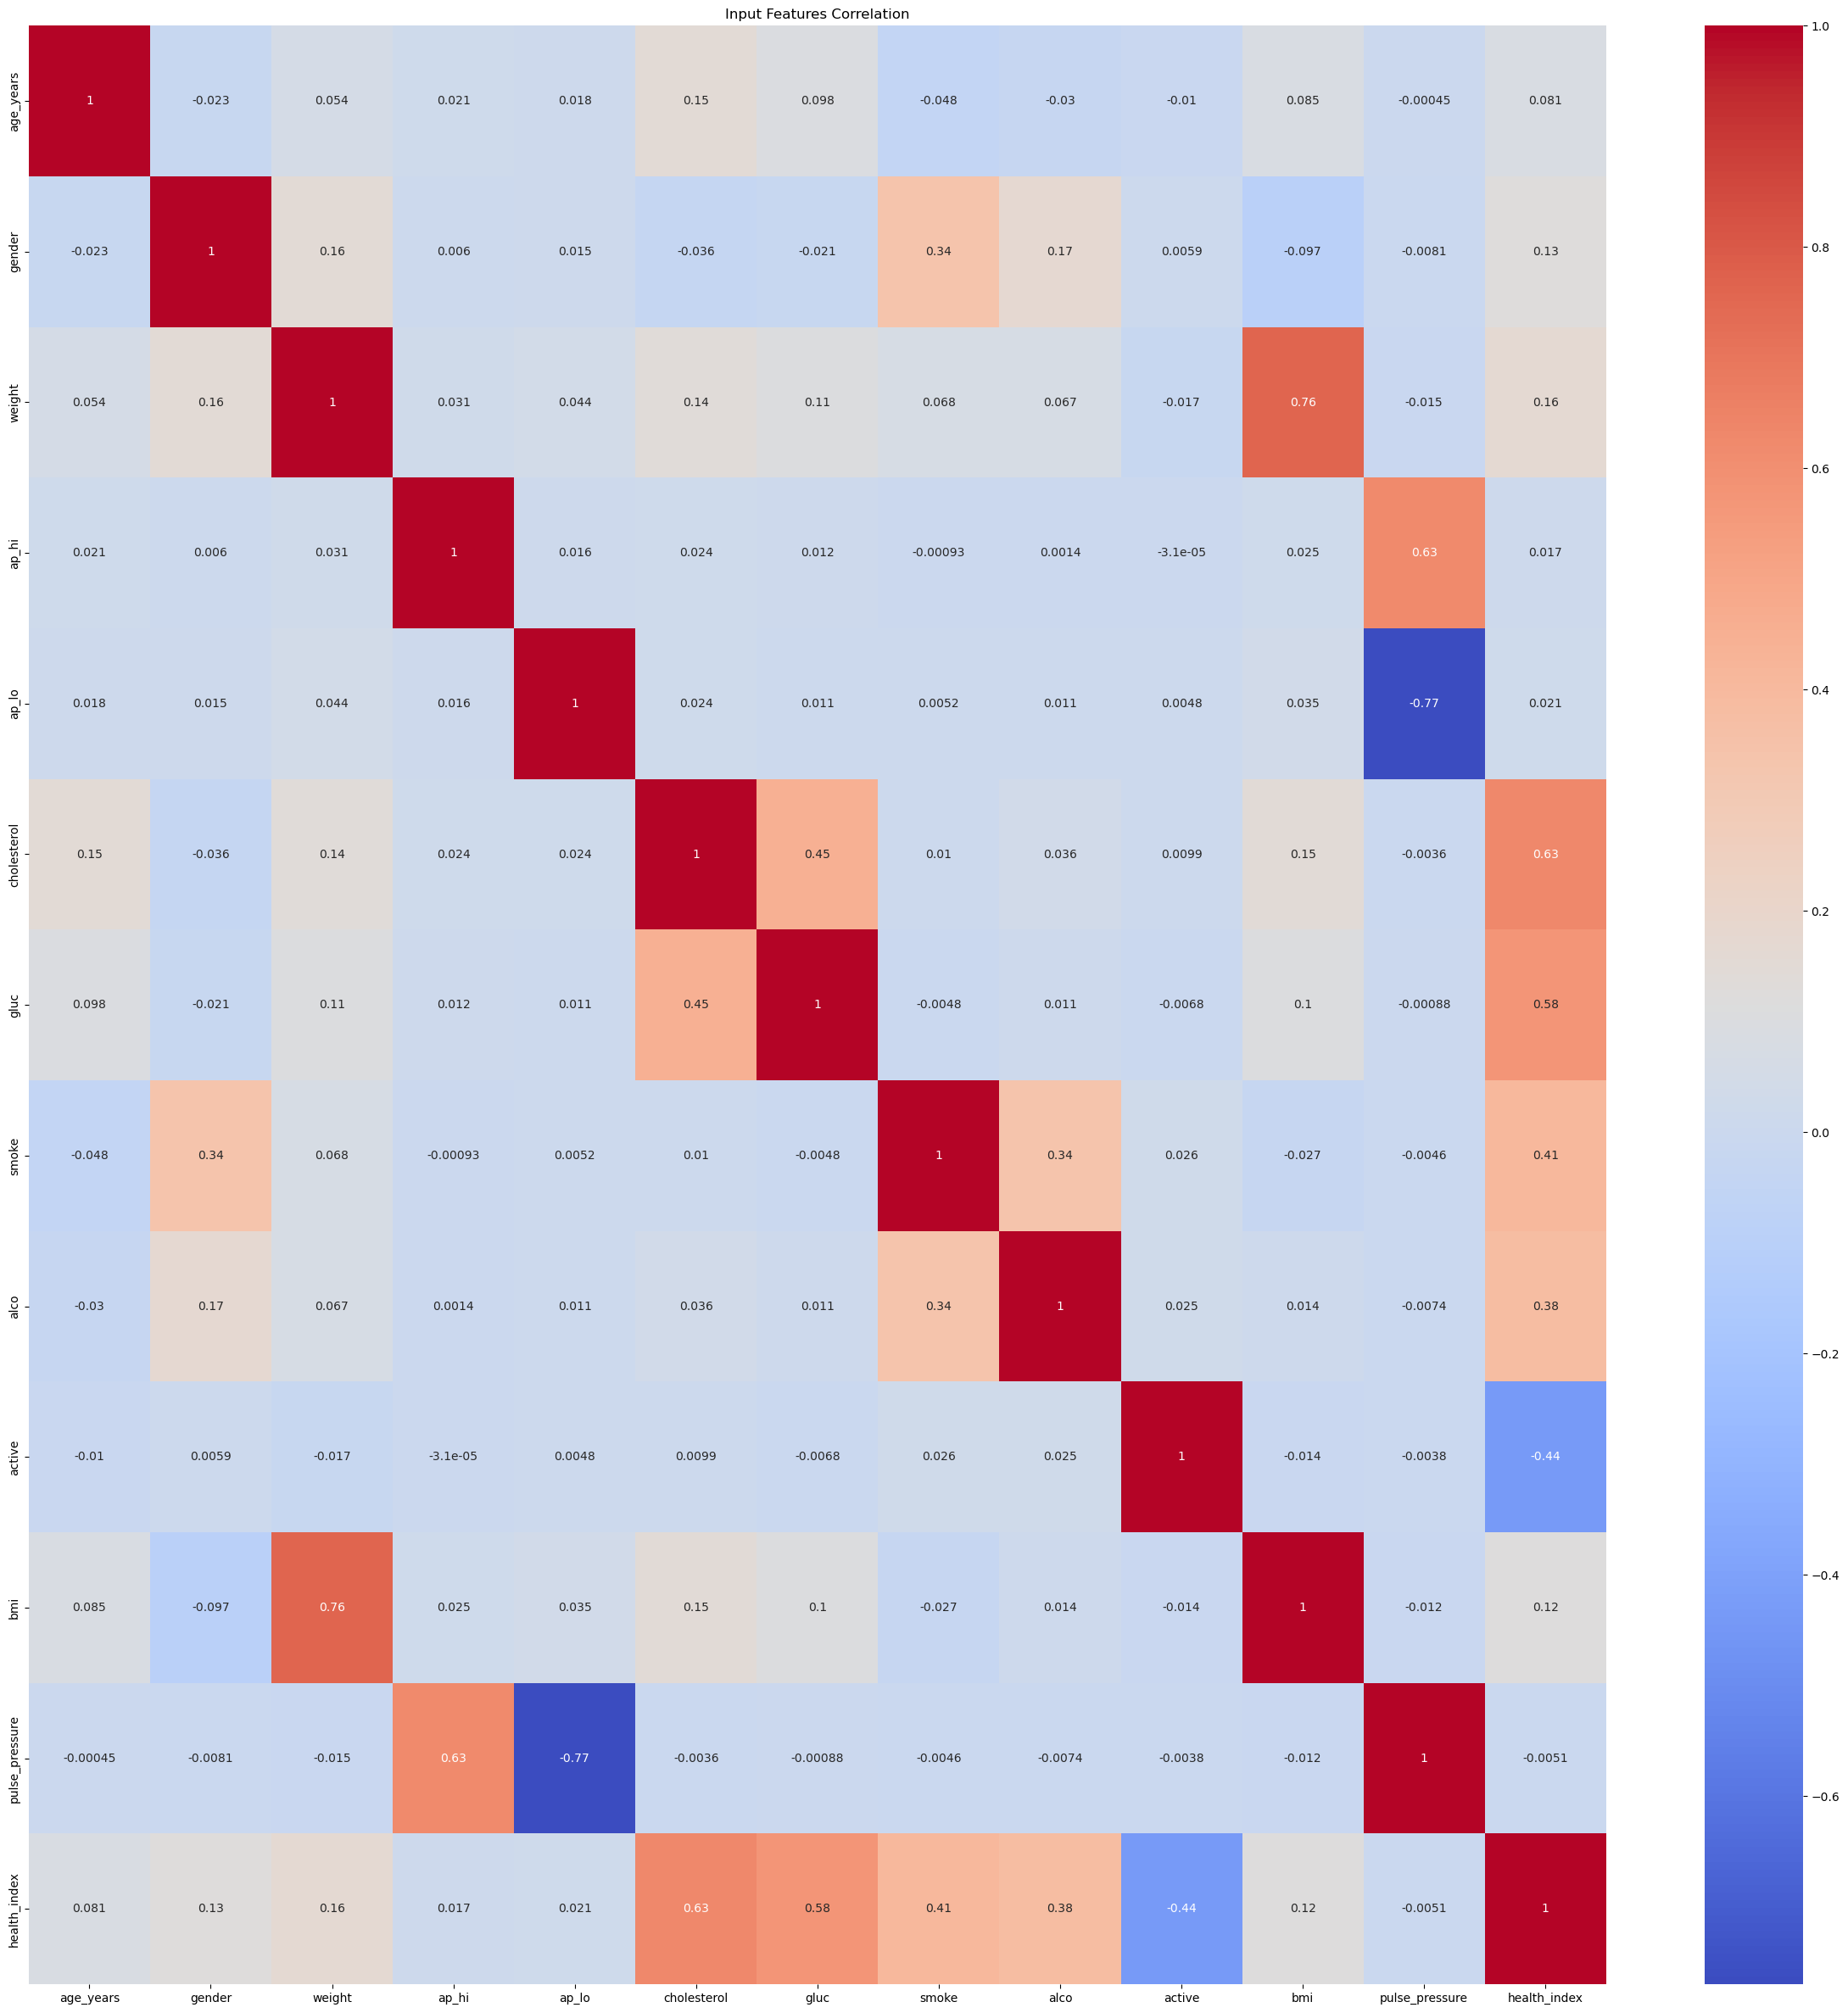

In [84]:
plt.figure(figsize = (30,30))
plt.title("Input Features Correlation")
sns.heatmap(
    df[FEATURES].corr(),
    annot=True,
    cmap='coolwarm',
)
plt.show()

In [85]:
# Move cardio to last column
cols = [col for col in df.columns if col != "cardio"] + ["cardio"]
df = df[cols]
df

,gender,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,age_years,bmi,pulse_pressure,health_index,cardio
0,2,62.0,110,80,1,1,0,0,1,50,21.967120,30,0,0
1,1,85.0,140,90,3,1,0,0,1,55,34.927679,50,1,1
2,1,64.0,130,70,3,1,0,0,0,51,23.507805,60,2,1
3,2,82.0,150,100,1,1,0,0,1,48,28.710479,50,0,1
4,1,56.0,100,60,1,1,0,0,0,47,23.011177,40,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,2,76.0,120,80,1,1,1,0,1,52,26.927438,40,1,0
69996,1,126.0,140,90,2,2,0,0,1,61,50.472681,50,2,1
69997,2,105.0,180,90,3,1,0,1,0,52,31.353579,90,3,1
69998,1,72.0,135,80,1,2,0,0,0,61,27.099251,55,2,1


In [88]:
df.to_csv("cleaned_dataset.csv", index=False)
print("Cleaned dataset saved as cardio_cleaned.csv")

Cleaned dataset saved as cardio_cleaned.csv
